# Import libraries

In [1]:
import numpy as np # For mathematical operations
import pandas as pd # For data Analysis
import matplotlib.pyplot as plt# For visualization
import seaborn as sns # Forvisualization and random distribution purpose
from sklearn.model_selection import train_test_split # for modeling
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import OneHotEncoder# for converting object columns into numarical columns
from sklearn import datasets, linear_model, metrics # for applying the linear model
from sklearn.linear_model import LinearRegression # For linear regression model
from sklearn.neighbors import KNeighborsRegressor # for knnregression
from sklearn.svm import SVR # for support vector machine regression
from sklearn.tree import DecisionTreeRegressor # For decision treeR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load the CSV File

In [2]:
lapdata=pd.read_csv(r"C:\Users\Shree\Desktop\lapdata.csv")

In [3]:
lapdata.drop(labels='Unnamed: 0',axis=1,inplace=True)
lapdata.head()

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
0,ASUS,Windows 11,16,0.50,Ryzen 7,64,3700U,1,46990,4.5,SSD
1,ASUS,Windows 11,8,1.00,Ryzen 5,64,5500U,1,63990,4.3,HDD
2,ASUS,Windows 11,8,0.25,Core i3,64,10th Gen,1,27990,4.2,SSD
3,MSI,Windows 11,8,0.50,Ryzen 5,64,5500U,0,39990,4.2,SSD
4,ASUS,Windows 11,8,0.50,Ryzen 5,32,3500U,1,35990,4.5,SSD


In [4]:
lapdata.head()

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
0,ASUS,Windows 11,16,0.50,Ryzen 7,64,3700U,1,46990,4.5,SSD
1,ASUS,Windows 11,8,1.00,Ryzen 5,64,5500U,1,63990,4.3,HDD
2,ASUS,Windows 11,8,0.25,Core i3,64,10th Gen,1,27990,4.2,SSD
3,MSI,Windows 11,8,0.50,Ryzen 5,64,5500U,0,39990,4.2,SSD
4,ASUS,Windows 11,8,0.50,Ryzen 5,32,3500U,1,35990,4.5,SSD


# Information about the data set

In [5]:
lapdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            579 non-null    object 
 1   Operating_System  579 non-null    object 
 2   RAM-GB            579 non-null    int64  
 3   Storage-TB        579 non-null    float64
 4   Processor         579 non-null    object 
 5   Bit               579 non-null    int64  
 6   Generation        579 non-null    object 
 7   Warranty-Years    579 non-null    int64  
 8   Price-₹           579 non-null    int64  
 9   Ratings           579 non-null    float64
 10  Memory_Type       579 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 49.9+ KB


In [6]:
lapdata.describe()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Price-₹,Ratings
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,11.357513,0.637090,63.889465,0.664940,79273.134715,4.352159
std,5.705730,0.338818,1.879099,0.543916,59197.921996,0.177569
min,4.000000,0.125000,32.000000,0.000000,18990.000000,4.100000
25%,8.000000,0.500000,64.000000,0.000000,42940.000000,4.200000
50%,8.000000,0.500000,64.000000,1.000000,60490.000000,4.300000
75%,16.000000,1.000000,64.000000,1.000000,90490.000000,4.500000
max,32.000000,2.000000,64.000000,3.000000,391990.000000,4.800000


In [7]:
lapdata.nunique()

Brands               17
Operating_System      4
RAM-GB                4
Storage-TB            5
Processor             8
Bit                   2
Generation           33
Warranty-Years        4
Price-₹             302
Ratings               7
Memory_Type           3
dtype: int64

In [8]:
# Find out the unique values in columns in the given dataset

In [9]:
for i in lapdata.columns:
    print(lapdata[i].value_counts(ascending=True).sort_index())
    print("-"*75)

ACER          40
ALIENWARE      3
APPLE          2
ASUS         202
AVITA          6
DELL          88
HP            82
INFINIX       16
LENOVO        72
LG             4
MI             1
MSI           49
NOKIA          2
REALME         5
REDMIBOOK      1
SAMSUNG        3
VAIO           3
Name: Brands, dtype: int64
---------------------------------------------------------------------------
DOS             1
Mac OS          2
Windows 10    205
Windows 11    371
Name: Operating_System, dtype: int64
---------------------------------------------------------------------------
4      36
8     324
16    198
32     21
Name: RAM-GB, dtype: int64
---------------------------------------------------------------------------
0.125      7
0.250     84
0.500    308
1.000    167
2.000     13
Name: Storage-TB, dtype: int64
---------------------------------------------------------------------------
Core i3    135
Core i5    188
Core i7     72
Core i9     17
Ryzen 3     31
Ryzen 5     56
Ryzen 7     56
Ryz

In [10]:
len(lapdata['Brands'].unique())

17

In [11]:
len(lapdata['Operating_System'].unique())

4

In [12]:
len(lapdata['RAM-GB'].unique())

4

In [13]:
len(lapdata['Storage-TB'].unique())

5

In [14]:
len(lapdata['Processor'].unique())

8

In [15]:
len(lapdata['Bit'].unique())

2

In [16]:
len(lapdata['Warranty-Years'].unique())

4

In [17]:
len(lapdata['Price-₹'].unique())

302

In [18]:
len(lapdata['Memory_Type'].unique())

3

In [19]:
len(lapdata['Ratings'].unique())

7

In [20]:
len(lapdata['Generation'].unique())

33

In [21]:
lapdata[lapdata['Generation']=='6900H']

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
107,ASUS,Windows 11,16,1.0,Ryzen 9,64,6900H,1,201990,4.5,SSD
184,ASUS,Windows 11,16,1.0,Ryzen 9,64,6900H,1,201990,4.6,SSD
213,ASUS,Windows 11,16,1.0,Ryzen 9,64,6900H,1,196990,4.5,SSD
292,ASUS,Windows 11,16,1.0,Ryzen 9,64,6900H,1,204990,4.5,SSD
326,ASUS,Windows 11,16,1.0,Ryzen 9,64,6900H,1,236990,4.5,SSD
357,ASUS,Windows 11,32,2.0,Ryzen 9,64,6900H,1,391990,4.5,SSD
358,ASUS,Windows 11,32,2.0,Ryzen 9,64,6900H,1,361990,4.3,SSD
363,ASUS,Windows 11,16,1.0,Ryzen 9,64,6900H,1,207990,4.2,SSD
453,ASUS,Windows 11,16,1.0,Ryzen 9,64,6900H,1,254990,4.6,SSD


# stastical summary about the given dataset

In [22]:
lapdata.describe() 

,RAM-GB,Storage-TB,Bit,Warranty-Years,Price-₹,Ratings
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,11.357513,0.637090,63.889465,0.664940,79273.134715,4.352159
std,5.705730,0.338818,1.879099,0.543916,59197.921996,0.177569
min,4.000000,0.125000,32.000000,0.000000,18990.000000,4.100000
25%,8.000000,0.500000,64.000000,0.000000,42940.000000,4.200000
50%,8.000000,0.500000,64.000000,1.000000,60490.000000,4.300000
75%,16.000000,1.000000,64.000000,1.000000,90490.000000,4.500000
max,32.000000,2.000000,64.000000,3.000000,391990.000000,4.800000


In [23]:
lapdata[lapdata['Price-₹']<=30000]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
2,ASUS,Windows 11,8,0.250,Core i3,64,10th Gen,1,27990,4.2,SSD
14,REDMIBOOK,Windows 10,8,0.250,Core i3,64,11th Gen,1,29990,4.2,SSD
17,INFINIX,Windows 11,4,0.125,Core i3,64,10th Gen,1,18990,4.1,SSD
21,ASUS,Windows 11,4,0.250,Core i3,64,4th Gen,1,25990,4.3,SSD
39,INFINIX,Windows 11,8,0.250,Core i3,64,10th Gen,1,22990,4.1,SSD
41,ASUS,Windows 11,8,1.000,Core i3,64,10th Gen,1,29990,4.3,HDD
44,LENOVO,Windows 11,8,0.250,Core i5,64,11th Gen,0,29374,4.5,SSD
51,ACER,Windows 11,4,0.250,Core i3,64,11th Gen,0,23990,4.4,SSD
79,INFINIX,Windows 11,4,0.125,Core i3,64,10th Gen,1,18999,4.2,SSD
96,ACER,Windows 11,8,0.250,Ryzen 3,64,3250U,0,28990,4.3,SSD


# now we need to filter the best laptops with good specification, price , rating from the DataFrame

# From out data frame lets find the laptops having ram less then 4 GB and price less then 20000

In [24]:
lapdata[(lapdata['RAM-GB']<=4)  & (lapdata['Price-₹']<=20000)] 

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
17,INFINIX,Windows 11,4,0.125,Core i3,64,10th Gen,1,18990,4.1,SSD
79,INFINIX,Windows 11,4,0.125,Core i3,64,10th Gen,1,18999,4.2,SSD
416,AVITA,Windows 11,4,0.125,Core i5,64,7th Gen,1,18990,4.2,SSD


# we are having 3 laptops with the given spacifications

# the best laptops that are having 4gb ram and less then 30000

In [25]:
lapdata[(lapdata['RAM-GB']<=4)  & (lapdata['Price-₹']<=30000)]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
17,INFINIX,Windows 11,4,0.125,Core i3,64,10th Gen,1,18990,4.1,SSD
21,ASUS,Windows 11,4,0.250,Core i3,64,4th Gen,1,25990,4.3,SSD
51,ACER,Windows 11,4,0.250,Core i3,64,11th Gen,0,23990,4.4,SSD
79,INFINIX,Windows 11,4,0.125,Core i3,64,10th Gen,1,18999,4.2,SSD
97,ACER,Windows 11,4,0.500,Ryzen 3,64,3250U,0,27990,4.5,SSD
135,ASUS,Windows 11,4,0.125,Core i3,64,11th Gen,1,22990,4.3,SSD
161,LENOVO,Windows 11,4,0.250,Core i3,64,4th Gen,0,27990,4.2,SSD
180,LENOVO,Windows 11,4,0.250,Core i3,64,4th Gen,0,27990,4.4,SSD
216,ASUS,Windows 11,4,0.125,Core i3,64,4th Gen,1,29990,4.4,SSD
246,ASUS,Windows 11,4,0.250,Core i3,64,11th Gen,0,28990,4.5,SSD


# now we will see the laptop that are having mack os

In [26]:
lapdata.columns

Index(['Brands', 'Operating_System', 'RAM-GB', 'Storage-TB', 'Processor',
       'Bit', 'Generation', 'Warranty-Years', 'Price-₹', 'Ratings',
       'Memory_Type'],
      dtype='object')

In [27]:
lapdata[lapdata['Operating_System']=='Mac OS'][['Brands','Operating_System', 'RAM-GB', 'Storage-TB', 'Processor','Bit', 'Generation', 'Warranty-Years', 'Ratings','Memory_Type','Price-₹']]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Ratings,Memory_Type,Price-₹
199,APPLE,Mac OS,16,1.000,Core i5,64,10th Gen,0,4.2,SSD,181990
217,APPLE,Mac OS,8,0.125,Core i5,64,5th Gen,0,4.2,SSD,73490


In [28]:
lapdata['Price-₹'].min()

18990

In [29]:
lapdata[lapdata['Price-₹']==18990]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
17,INFINIX,Windows 11,4,0.125,Core i3,64,10th Gen,1,18990,4.1,SSD
416,AVITA,Windows 11,4,0.125,Core i5,64,7th Gen,1,18990,4.2,SSD


In [30]:
lapdata[(lapdata['Price-₹']>=40000) &(lapdata['Price-₹']<=60000)]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
0,ASUS,Windows 11,16,0.50,Ryzen 7,64,3700U,1,46990,4.5,SSD
5,LENOVO,Windows 11,8,0.50,Ryzen 5,64,5500U,0,48990,4.3,SSD
6,ACER,Windows 10,8,0.50,Ryzen 5,64,5500U,0,49990,4.5,SSD
8,HP,Windows 11,16,0.50,Core i5,64,12th Gen,1,58499,4.8,SSD
9,MSI,Windows 11,8,0.50,Ryzen 5,64,5600H,0,49990,4.4,SSD
...,...,...,...,...,...,...,...,...,...,...,...
566,ASUS,Windows 11,8,0.25,Core i3,64,12th Gen,0,44980,4.5,SSD
568,MSI,Windows 10,8,0.50,Core i5,64,9th Gen,0,57999,4.4,SSD
569,DELL,Windows 10,8,1.00,Ryzen 5,64,11th Gen,0,52890,4.4,HDD
573,DELL,Windows 11,8,1.00,Core i5,64,11th Gen,1,56326,4.6,HDD


# lets find the maximum price

In [31]:
lapdata['Price-₹'].max()

391990

In [32]:
lapdata[lapdata['Price-₹']==391990]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
357,ASUS,Windows 11,32,2.0,Ryzen 9,64,6900H,1,391990,4.5,SSD


# in our lapdata Dataframe ASUS is the hightest price laptop

In [33]:
lapdata[(lapdata['Brands']=='ACER') & (lapdata['RAM-GB']==4)]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
51,ACER,Windows 11,4,0.25,Core i3,64,11th Gen,0,23990,4.4,SSD
97,ACER,Windows 11,4,0.50,Ryzen 3,64,3250U,0,27990,4.5,SSD
342,ACER,Windows 11,4,0.25,Core i3,64,11th Gen,0,32800,4.5,SSD
502,ACER,Windows 11,4,0.25,Core i3,64,11th Gen,0,33400,4.2,SSD


In [34]:
lapdata[(lapdata['Brands']=='ACER') & (lapdata['RAM-GB']==4)]['Price-₹'].mean()

29545.0

In [35]:
pd.pivot_table(lapdata,index=["Brands",'RAM-GB'],values=['Price-₹'])

Price-₹
Brands    RAM-GB               
ACER      4        29545.000000
          8        51173.869565
          16      114751.538462
ALIENWARE 16      207390.000000
          32      345390.000000
APPLE     8        73490.000000
          16      181990.000000
ASUS      4        30356.666667
          8        54075.595506
          16      119573.755814
          32      278323.333333
AVITA     4        19740.000000
          8        67432.750000
DELL      4        41786.714286
          8        49816.867647
          16       83206.153846
HP        8        49973.236364
          16       85190.185185
INFINIX   4        18994.500000
          8        32190.000000
          16       43490.000000
LENOVO    4        35262.555556
          8        57615.414634
          16      100441.318182
LG        8        77365.000000
MI        8        59990.000000
MSI       8        58532.294118
          16      123860.370370
          32      295190.000000
NOKIA     8        32990.000000
          16       35990.000000
REALME    8        49996.750000
          16       64999.000000
REDMIBOOK 8        29990.000000
SAMSUNG   8        66494.500000
          16       69990.000000
VAIO      8        55656.666667

In [36]:
# Hear the price will be in mean

In [37]:
pd.pivot_table(lapdata,index=["Brands",'Processor'],values=['Price-₹'])

Price-₹
Brands    Processor               
ACER      Core i3     32248.166667
          Core i5     57951.538462
          Core i7    138390.000000
          Core i9    139990.000000
          Ryzen 3     30323.333333
          Ryzen 5     54547.142857
          Ryzen 7     85656.666667
ALIENWARE Core i7    207390.000000
          Core i9    345390.000000
APPLE     Core i5    127740.000000
ASUS      Core i3     38398.530612
          Core i5     71073.075472
          Core i7    133165.000000
          Core i9    270262.727273
          Ryzen 3     33928.000000
          Ryzen 5     68406.666667
          Ryzen 7    117686.666667
          Ryzen 9    174067.727273
AVITA     Core i5     51535.166667
DELL      Core i3     43317.032258
          Core i5     62746.187500
          Core i7     89246.000000
          Ryzen 3     39731.666667
          Ryzen 5     59491.250000
          Ryzen 7     95290.000000
HP        Core i3     43379.950000
          Core i5     68324.590909
          Core i7    100245.000000
          Ryzen 3     36063.000000
          Ryzen 5     59434.000000
          Ryzen 7     95315.500000
          Ryzen 9    129899.000000
INFINIX   Core i3     26241.125000
          Core i5     38323.333333
          Core i7     46990.000000
LENOVO    Core i3     37486.647059
          Core i5     63512.172414
          Core i7    127573.545455
          Ryzen 3     33494.500000
          Ryzen 5     61990.000000
          Ryzen 7     84325.000000
LG        Core i5     77365.000000
MI        Core i7     59990.000000
MSI       Core i3     48790.000000
          Core i5     65136.846154
          Core i7    149210.000000
          Core i9    231323.333333
          Ryzen 5     44493.333333
          Ryzen 7     78990.000000
          Ryzen 9    124990.000000
NOKIA     Core i5     34490.000000
REALME    Core i3     39994.500000
          Core i5     61665.666667
REDMIBOOK Core i3     29990.000000
SAMSUNG   Core i5     67659.666667
VAIO      Ryzen 5     50990.000000
          Ryzen 7     57990.000000

# This pivot table indicates the mean price of each laptop depend on the processor.

In [38]:
pd.pivot_table(lapdata,index=["Brands",'RAM-GB','Processor'],values=['Price-₹'])

Price-₹
Brands    RAM-GB Processor              
ACER      4      Core i3    30063.333333
                 Ryzen 3    27990.000000
          8      Core i3    34433.000000
                 Core i5    56890.000000
                 Ryzen 3    31490.000000
...                                  ...
REDMIBOOK 8      Core i3    29990.000000
SAMSUNG   8      Core i5    66494.500000
          16     Core i5    69990.000000
VAIO      8      Ryzen 5    50990.000000
                 Ryzen 7    57990.000000

[95 rows x 1 columns]

# Hear we can see the price depends on ram and processor

In [39]:
pd.pivot_table(lapdata,index=["Brands"],values=['Price-₹'])

,Price-₹
Brands,
ACER,69673.725000
ALIENWARE,253390.000000
APPLE,127740.000000
ASUS,97203.965347
AVITA,51535.166667
DELL,54110.613636
HP,61569.060976
INFINIX,33365.562500
LENOVO,67907.000000


In [40]:
pd.pivot_table(lapdata,index=["Operating_System"],values=['Price-₹'])

,Price-₹
Operating_System,
DOS,56990.000000
Mac OS,127740.000000
Windows 10,75299.702439
Windows 11,81267.482480


# The pivot Table reprasents the mean relation of proice to the different kinds of OS the mean price Windows 11 is more as compared with the others.

In [41]:
lapdata[(lapdata['Price-₹']>=40000) & (lapdata['Price-₹']<=60000)]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
0,ASUS,Windows 11,16,0.50,Ryzen 7,64,3700U,1,46990,4.5,SSD
5,LENOVO,Windows 11,8,0.50,Ryzen 5,64,5500U,0,48990,4.3,SSD
6,ACER,Windows 10,8,0.50,Ryzen 5,64,5500U,0,49990,4.5,SSD
8,HP,Windows 11,16,0.50,Core i5,64,12th Gen,1,58499,4.8,SSD
9,MSI,Windows 11,8,0.50,Ryzen 5,64,5600H,0,49990,4.4,SSD
...,...,...,...,...,...,...,...,...,...,...,...
566,ASUS,Windows 11,8,0.25,Core i3,64,12th Gen,0,44980,4.5,SSD
568,MSI,Windows 10,8,0.50,Core i5,64,9th Gen,0,57999,4.4,SSD
569,DELL,Windows 10,8,1.00,Ryzen 5,64,11th Gen,0,52890,4.4,HDD
573,DELL,Windows 11,8,1.00,Core i5,64,11th Gen,1,56326,4.6,HDD


# visualisations

In [42]:
x=lapdata.groupby(['Brands','Processor'])['Price-₹']

Text(0, 0.5, 'Price')

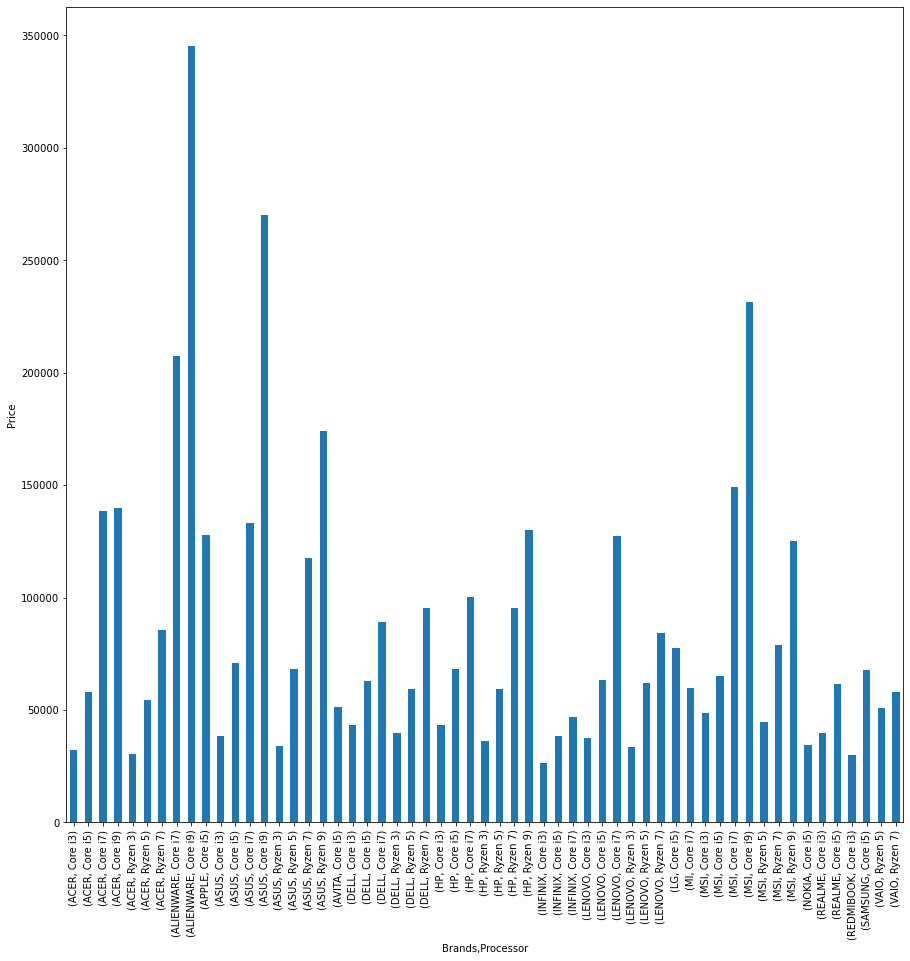

In [43]:
plt.figure(figsize=(15,15))
x.mean().plot(kind='bar')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

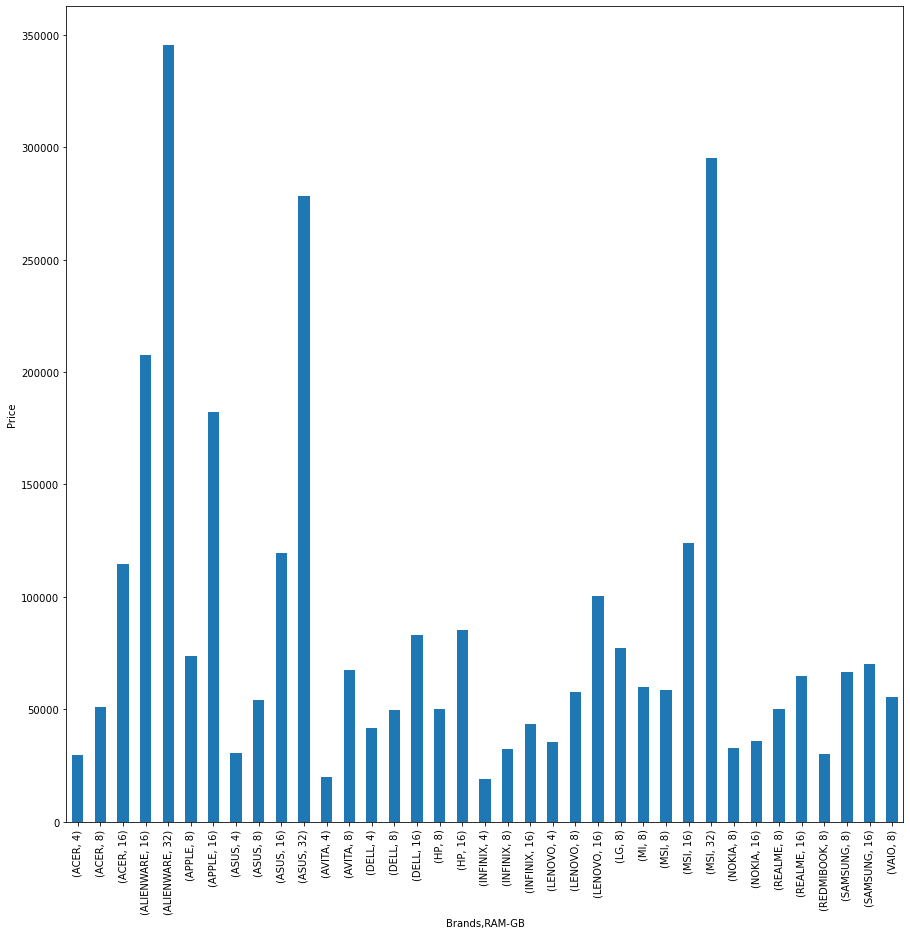

In [49]:
y=lapdata.groupby(['Brands','RAM-GB'])['Price-₹']
plt.figure(figsize=(15,15))
y.mean().plot(kind='bar')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

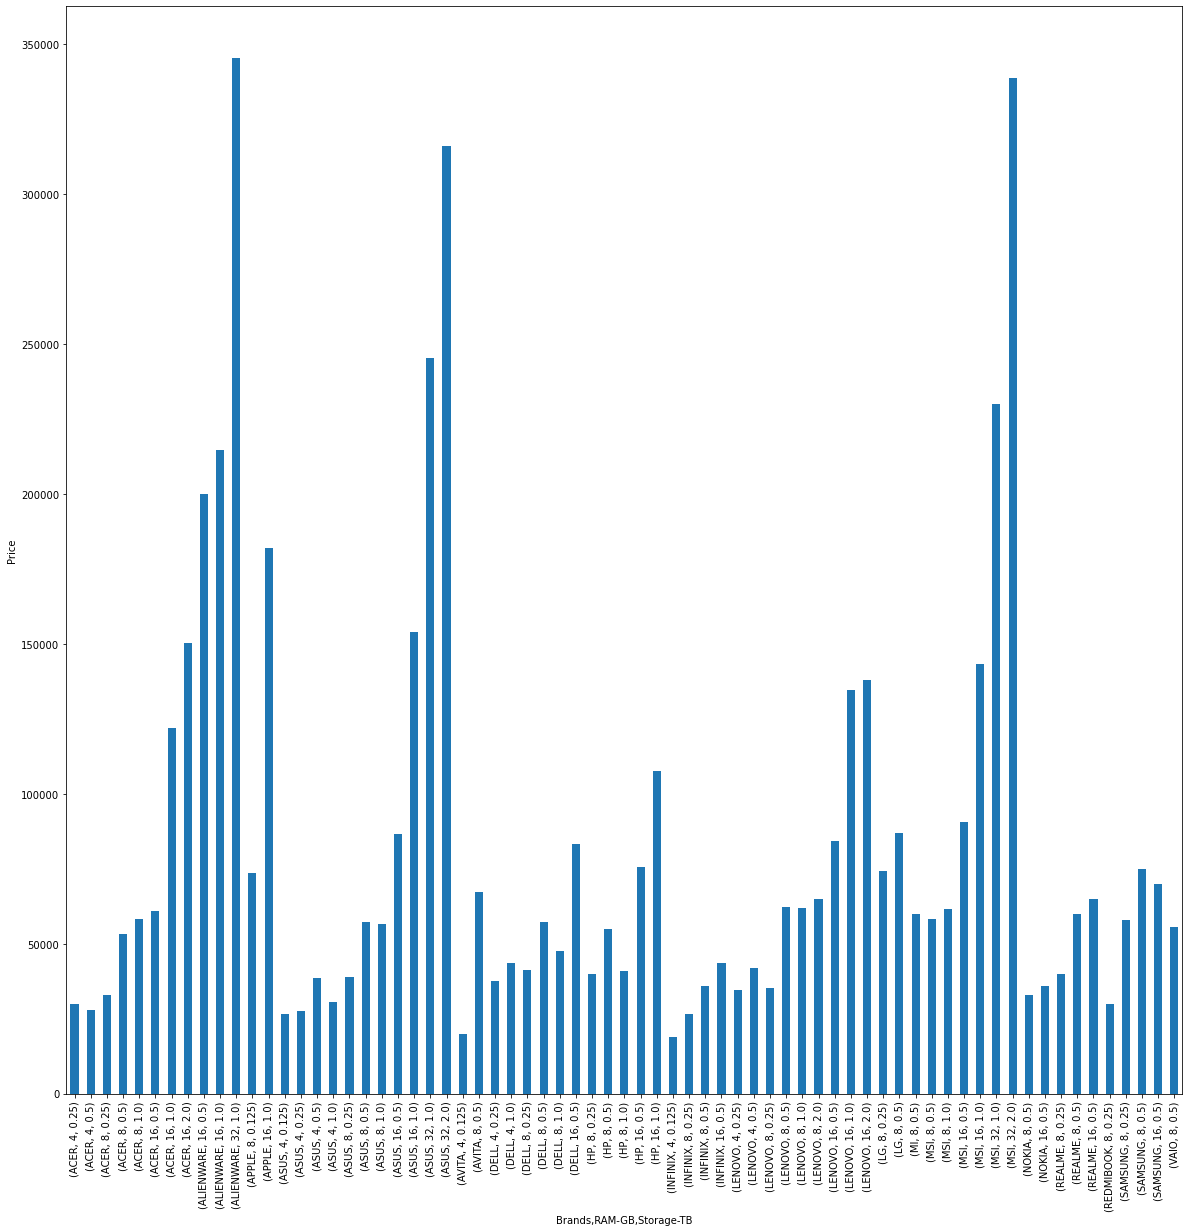

In [50]:
y=lapdata.groupby(['Brands','RAM-GB','Storage-TB'])['Price-₹']
plt.figure(figsize=(20,20))
y.mean().plot(kind='bar')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

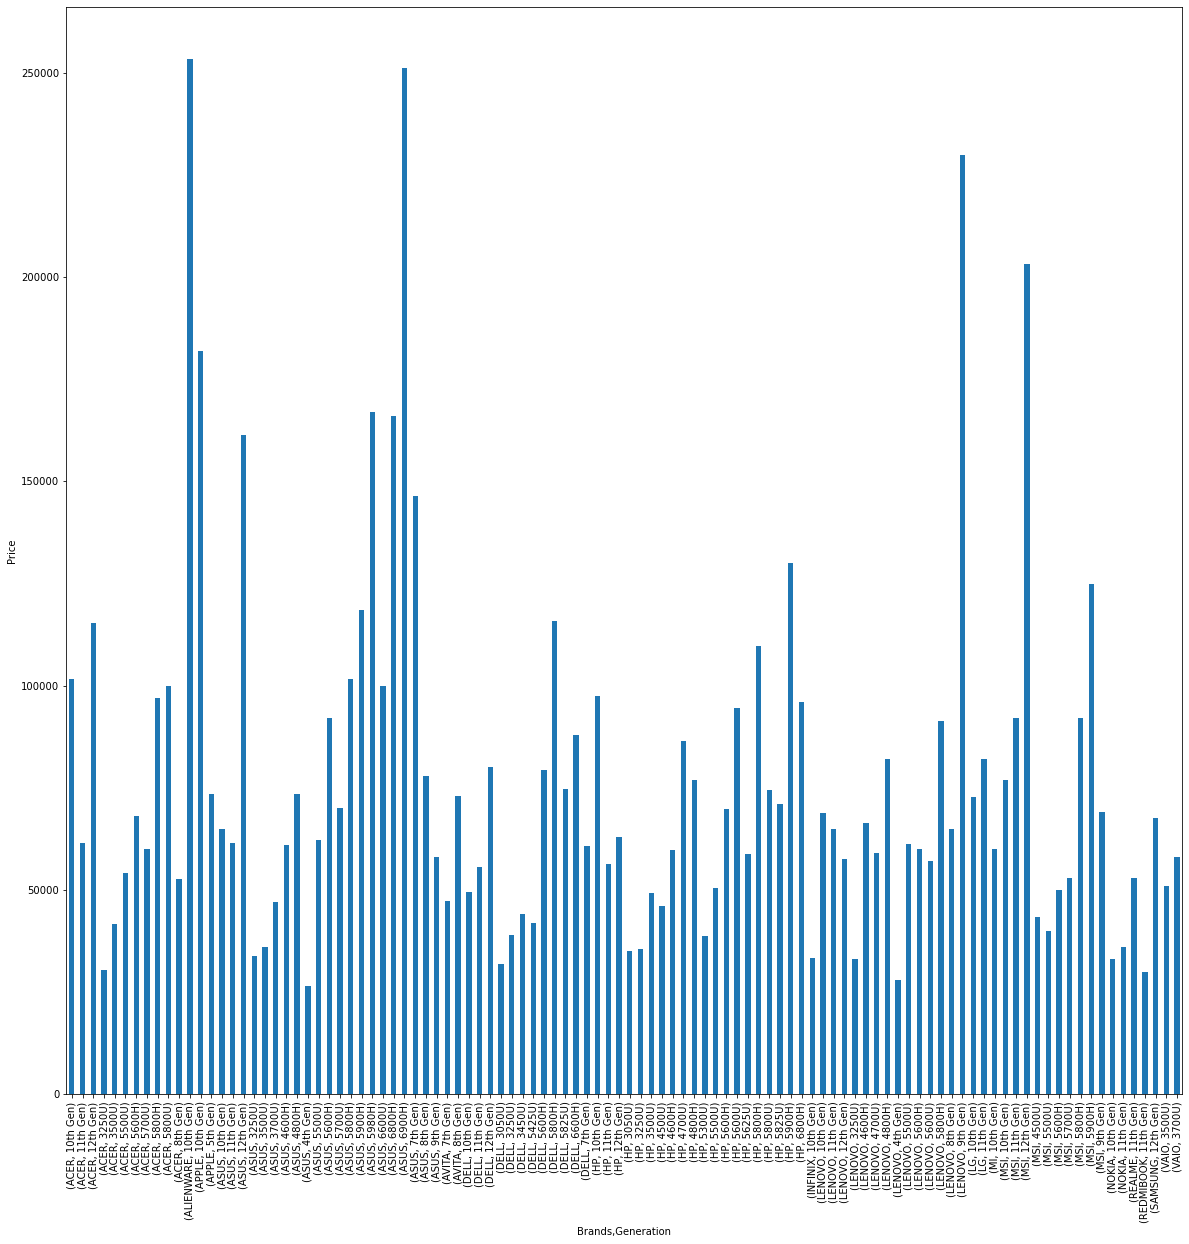

In [51]:
y=lapdata.groupby(['Brands','Generation'])['Price-₹']
plt.figure(figsize=(20,20))
y.mean().plot(kind='bar')
plt.ylabel('Price')

In [52]:
g=lapdata.groupby('Brands')

In [53]:
g.ngroups

17

In [54]:
g.groups

{'ACER': [6, 12, 26, 38, 40, 45, 47, 51, 83, 96, 97, 113, 125, 128, 215, 251, 282, 291, 296, 310, 313, 317, 318, 331, 335, 342, 360, 366, 389, 390, 417, 424, 439, 476, 496, 502, 515, 520, 565, 567], 'ALIENWARE': [362, 478, 554], 'APPLE': [199, 217], 'ASUS': [0, 1, 2, 4, 7, 11, 13, 15, 18, 19, 21, 22, 23, 27, 28, 29, 30, 34, 36, 37, 41, 46, 55, 61, 63, 66, 68, 69, 70, 71, 72, 75, 80, 81, 88, 92, 93, 94, 98, 100, 102, 103, 105, 107, 108, 112, 117, 119, 120, 123, 124, 126, 133, 135, 137, 138, 141, 142, 146, 150, 152, 154, 158, 163, 169, 171, 173, 175, 176, 177, 182, 184, 186, 187, 189, 192, 193, 197, 198, 200, 202, 204, 209, 213, 216, 220, 221, 224, 225, 228, 231, 234, 235, 237, 240, 246, 248, 250, 254, 255, ...], 'AVITA': [416, 514, 536, 539, 556, 576], 'DELL': [16, 20, 24, 43, 56, 57, 64, 73, 77, 86, 91, 101, 106, 111, 122, 131, 132, 134, 140, 145, 149, 151, 153, 159, 166, 167, 178, 179, 183, 185, 188, 191, 194, 201, 207, 208, 212, 239, 243, 244, 252, 260, 262, 263, 267, 271, 272, 275, 

In [55]:
g.get_group('LENOVO')

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
5,LENOVO,Windows 11,8,0.50,Ryzen 5,64,5500U,0,48990,4.3,SSD
35,LENOVO,Windows 11,8,0.25,Core i3,64,10th Gen,0,33490,4.2,SSD
44,LENOVO,Windows 11,8,0.25,Core i5,64,11th Gen,0,29374,4.5,SSD
53,LENOVO,Windows 11,8,0.50,Core i3,64,11th Gen,0,38990,4.2,SSD
58,LENOVO,Windows 11,8,0.50,Ryzen 3,64,3250U,0,32990,4.4,SSD
...,...,...,...,...,...,...,...,...,...,...,...
546,LENOVO,Windows 10,8,0.25,Core i3,64,10th Gen,2,38980,4.5,SSD
549,LENOVO,Windows 10,16,1.00,Core i7,64,9th Gen,3,229900,4.8,SSD
553,LENOVO,Windows 11,16,1.00,Core i7,64,11th Gen,0,157990,4.2,SSD
562,LENOVO,Windows 10,8,1.00,Ryzen 5,64,4600H,0,66990,4.3,HDD


In [57]:
g.mean()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Price-₹,Ratings
Brands,,,,,,
ACER,10.200000,0.650000,64.000000,0.000000,69673.725000,4.360000
ALIENWARE,21.333333,0.833333,64.000000,0.000000,253390.000000,4.366667
APPLE,12.000000,0.562500,64.000000,0.000000,127740.000000,4.200000
ASUS,12.950495,0.719059,63.841584,0.836634,97203.965347,4.338614
AVITA,6.666667,0.375000,64.000000,0.833333,51535.166667,4.333333
DELL,8.863636,0.588068,64.000000,0.727273,54110.613636,4.357955
HP,10.634146,0.564024,63.609756,0.890244,61569.060976,4.371951
INFINIX,9.500000,0.390625,64.000000,1.000000,33365.562500,4.337500
LENOVO,9.944444,0.559028,64.000000,0.375000,67907.000000,4.375000


In [58]:
lapdata[(lapdata['Operating_System']=='Windows 11') & (lapdata['RAM-GB']==32) & (lapdata['Storage-TB']==2) & (lapdata['Processor']=='Core i9') & (lapdata['Bit']==64)&(lapdata['Generation']=='12th Gen')]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
400,MSI,Windows 11,32,2.0,Core i9,64,12th Gen,0,390990,4.2,SSD
403,ASUS,Windows 11,32,2.0,Core i9,64,12th Gen,1,359990,4.4,SSD
429,ASUS,Windows 11,32,2.0,Core i9,64,12th Gen,1,331990,4.3,SSD
547,ASUS,Windows 11,32,2.0,Core i9,64,12th Gen,1,264990,4.3,SSD


# The best laptops with given requirmnts likre os,ram prossor bit gen and we get Asus and Msi brands.

In [60]:
lapdata

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
0,ASUS,Windows 11,16,0.50,Ryzen 7,64,3700U,1,46990,4.5,SSD
1,ASUS,Windows 11,8,1.00,Ryzen 5,64,5500U,1,63990,4.3,HDD
2,ASUS,Windows 11,8,0.25,Core i3,64,10th Gen,1,27990,4.2,SSD
3,MSI,Windows 11,8,0.50,Ryzen 5,64,5500U,0,39990,4.2,SSD
4,ASUS,Windows 11,8,0.50,Ryzen 5,32,3500U,1,35990,4.5,SSD
...,...,...,...,...,...,...,...,...,...,...,...
574,ASUS,Windows 11,8,0.25,Ryzen 3,64,3250U,1,32490,4.1,SSD
575,ASUS,Windows 11,16,1.00,Ryzen 7,64,5800H,1,94990,4.4,SSD
576,AVITA,Windows 10,8,0.50,Core i5,64,8th Gen,1,73063,4.3,SSD
577,DELL,Windows 10,8,1.00,Core i7,64,7th Gen,1,60758,4.3,HDD


In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Univariate Analysis

In [63]:
# Numarirical columns- Ram, Storage, Bit, Warranty, price, rating
# Categirical columns- Brands, oppar-Sys, Processor, Gen, Memory type

In [64]:
# Plot on numarical- Hist plot, Dist plot, kde plot, box plo
# Plots on categirical- Pie plot and Count

Text(0, 0.5, 'frequency')

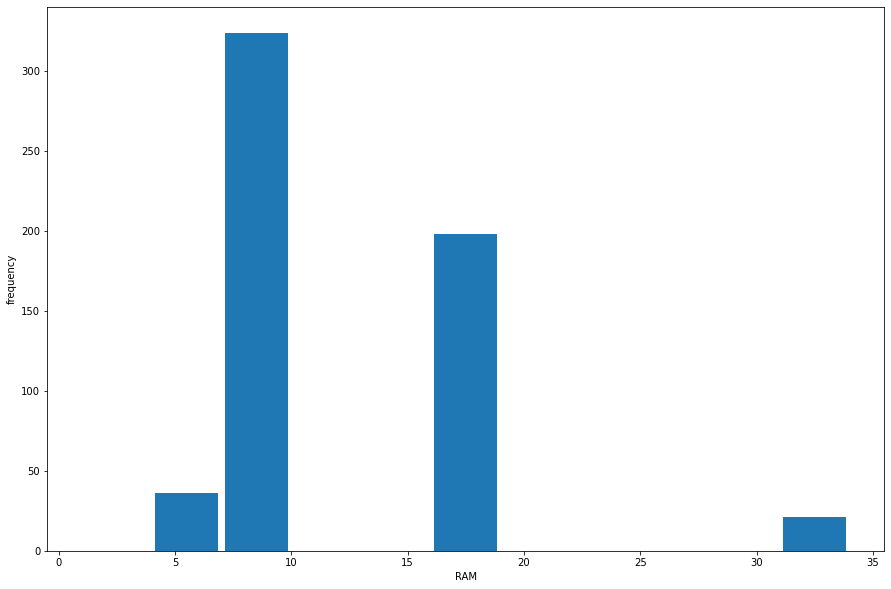

In [65]:
plt.figure(figsize=(15,10))
plt.hist(lapdata['RAM-GB'],bins=[1,4,7,10,13,16,19,22,25,28,31,34],rwidth=0.9)
plt.xlabel('RAM')
plt.ylabel('frequency')

# Brand vs price

Text(0, 0.5, 'Price-₹')

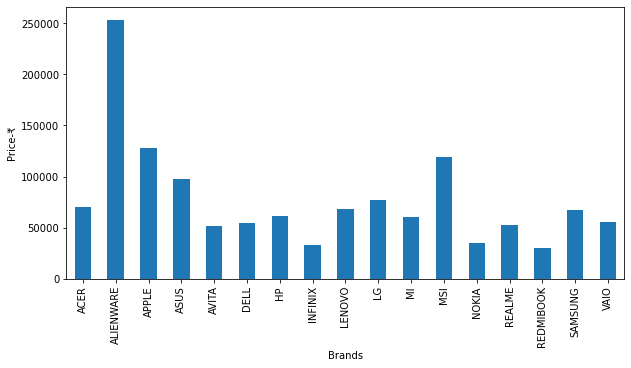

In [14]:
y=lapdata.groupby(['Brands'])['Price-₹']
plt.figure(figsize=(10,5))
y.mean().plot(kind='bar')
plt.xlabel('Brands')
plt.ylabel('Price-₹')

In [68]:
lapdata['Price-₹'].max()

391990

In [69]:
lapdata[lapdata['Price-₹']==391990]

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
357,ASUS,Windows 11,32,2.0,Ryzen 9,64,6900H,1,391990,4.5,SSD


# Genaration vs price

Text(0, 0.5, 'Price-₹')

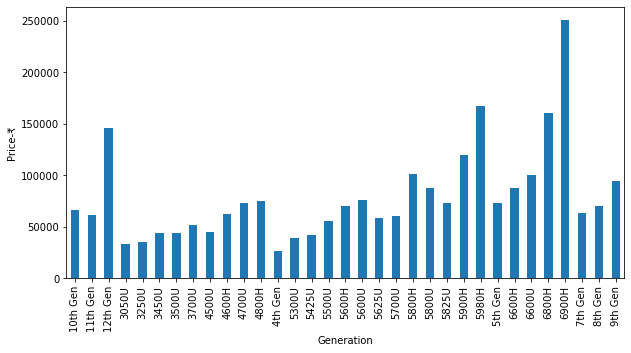

In [17]:
y=lapdata.groupby(['Generation'])['Price-₹']
plt.figure(figsize=(10,5))
y.mean().plot(kind='bar')
plt.xlabel('Generation')
plt.ylabel('Price-₹')

# RAM vs price

Text(0, 0.5, 'Price-₹')

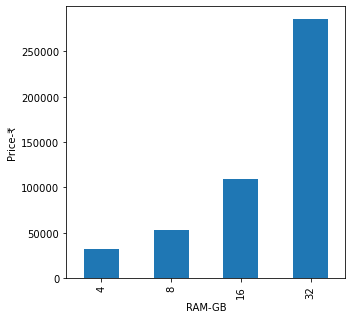

In [19]:
y=lapdata.groupby(['RAM-GB'])['Price-₹']
plt.figure(figsize=(5,5))
y.mean().plot(kind='bar')
plt.xlabel('RAM-GB')
plt.ylabel('Price-₹')

# Price vs processor

Text(0, 0.5, 'Price-₹')

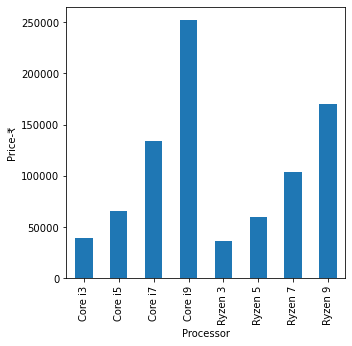

In [21]:
y=lapdata.groupby(['Processor'])['Price-₹']
plt.figure(figsize=(5,5))
y.mean().plot(kind='bar')
plt.xlabel('Processor')
plt.ylabel('Price-₹')

# in our data frame there about 15% laptop are having 8GB RAM and around 9% are of 16GB RAM

Text(0, 0.5, 'frequency')

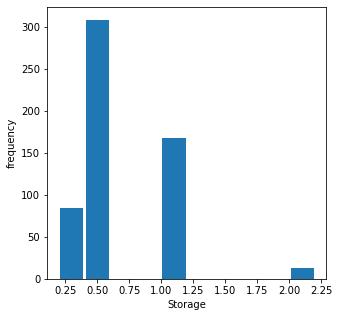

In [22]:
plt.figure(figsize=(5,5))
plt.hist(lapdata['Storage-TB'],bins=[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2],rwidth=0.9)
plt.xlabel('Storage')
plt.ylabel('frequency')

# Maximum of laptop contains 500 GB and 1TB Storage capacity 

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price-₹')

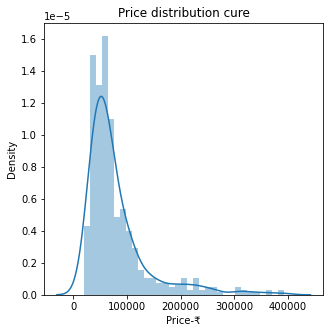

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(x=lapdata['Price-₹'])
plt.title('Price distribution cure')
plt.xlabel('Price-₹')

# More then 12% of laptops are at 50k price

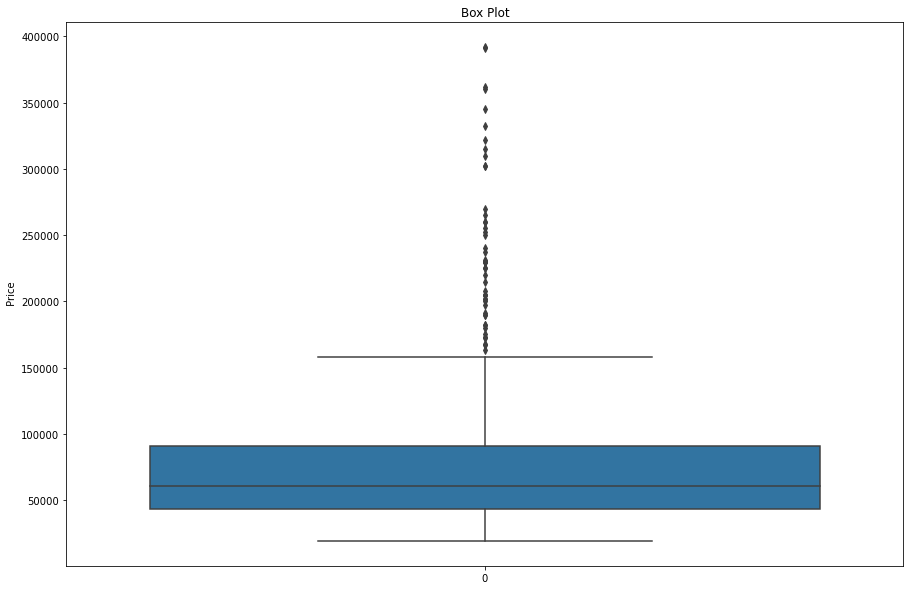

In [78]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data=lapdata['Price-₹'],)
plt.title('Box Plot')
plt.ylabel(' Price')
plt.show()


In [79]:
# plots for Catagirical column

In [80]:
lapdata['Brands'].value_counts()

ASUS         202
DELL          88
HP            82
LENOVO        72
MSI           49
ACER          40
INFINIX       16
AVITA          6
REALME         5
LG             4
SAMSUNG        3
ALIENWARE      3
VAIO           3
NOKIA          2
APPLE          2
REDMIBOOK      1
MI             1
Name: Brands, dtype: int64

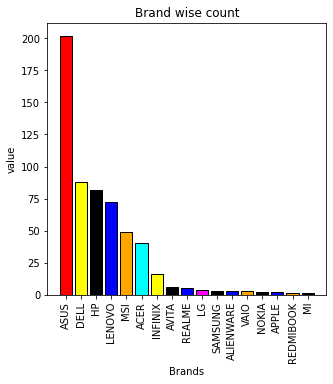

In [24]:
plt.figure(figsize=(5,5))
c = ['red', 'yellow', 'black', 'blue', 'orange','cyan','yellow', 'black', 'blue','magenta','black', 'blue', 'orange','black', 'blue', 'orange','black']
plt.bar(['ASUS','DELL','HP','LENOVO','MSI','ACER','INFINIX','AVITA','REALME','LG','SAMSUNG','ALIENWARE','VAIO','NOKIA','APPLE','REDMIBOOK','MI'],[202,88,82,72,49,40,16,6,5,4,3,3,3,2,2,1,1],color=c,edgecolor = 'k')
plt.xticks(rotation=90)
plt.title('Brand wise count')
plt.xlabel('Brands')
plt.ylabel('value')
plt.show()

In [82]:
lapdata['Operating_System'].value_counts()

Windows 11    371
Windows 10    205
Mac OS          2
DOS             1
Name: Operating_System, dtype: int64

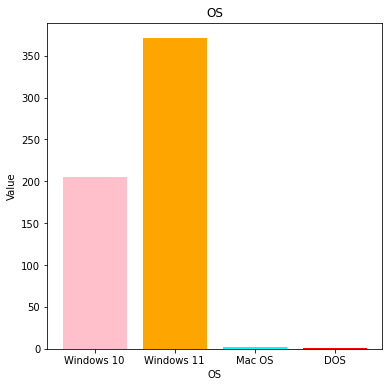

In [83]:
plt.figure(figsize=(6,6))
plt.bar(['Windows 10','Windows 11','Mac OS','DOS'],[205,371,2,1],color=['pink', 'orange','cyan','r'])
plt.title('OS')
plt.xlabel('OS')
plt.ylabel('Value')
plt.show()

In [84]:
lapdata['Processor'].value_counts()

Core i5    188
Core i3    135
Core i7     72
Ryzen 7     56
Ryzen 5     56
Ryzen 3     31
Ryzen 9     24
Core i9     17
Name: Processor, dtype: int64

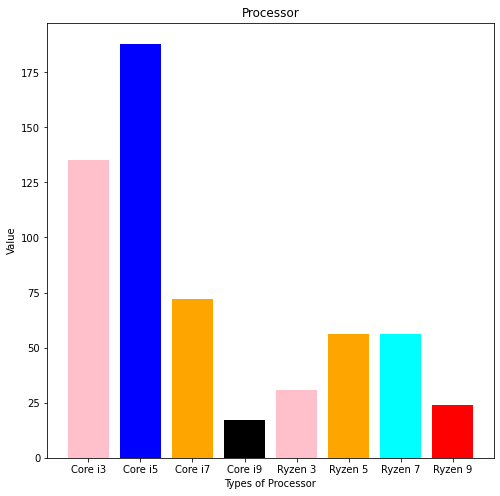

In [85]:
plt.figure(figsize=(8,8))
plt.bar(['Core i3','Core i5','Core i7','Core i9','Ryzen 3','Ryzen 5','Ryzen 7','Ryzen 9'],[135,188,72,17,31,56,56,24],color=['pink','blue', 'orange','black','pink', 'orange','cyan','r'])
plt.title('Processor')
plt.xlabel('Types of Processor')
plt.ylabel('Value')
plt.show()

In [86]:
lapdata['Memory_Type'].value_counts()

SSD     504
HDD      73
EMMC      2
Name: Memory_Type, dtype: int64

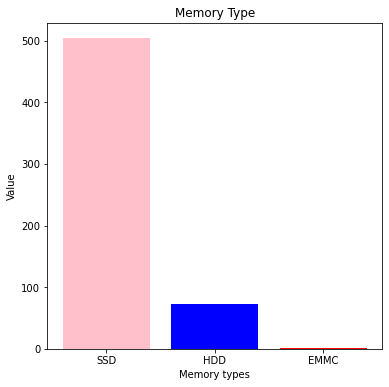

In [87]:
plt.figure(figsize=(6,6))
plt.bar(['SSD','HDD','EMMC'],[504,73,2],color=['pink','blue', 'r'])
plt.title('Memory Type')
plt.xlabel('Memory types')
plt.ylabel('Value')
plt.show()

In [88]:
lapdata['RAM-GB'].value_counts()

8     324
16    198
4      36
32     21
Name: RAM-GB, dtype: int64

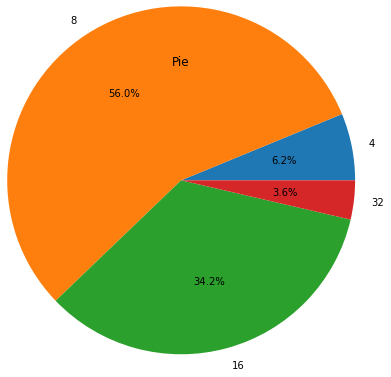

In [89]:
plt.pie([36,324,198,21],labels=['4','8','16','32'],autopct='%0.1f%%',radius=2)
plt.title('Pie')
plt.show()

In [90]:
lapdata['Ratings'].value_counts()

4.3    129
4.2    128
4.4     98
4.5     96
4.1     62
4.8     33
4.6     33
Name: Ratings, dtype: int64

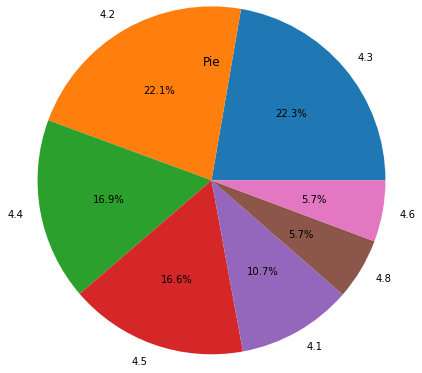

In [91]:
plt.pie([129,128,98,96,62,33,33],labels=['4.3','4.2','4.4','4.5','4.1','4.8','4.6'],autopct='%0.1f%%',radius=2)
plt.title('Pie')
plt.show()

# Numarical vs Numarical

<AxesSubplot:xlabel='RAM-GB', ylabel='Price-₹'>

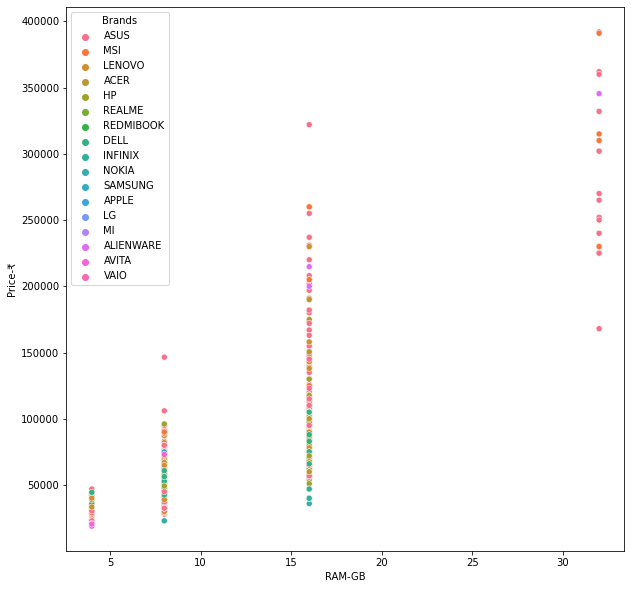

In [93]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=lapdata,y='Price-₹',x='RAM-GB',hue='Brands')

# Price vs memory type

In [95]:
ssd=lapdata[lapdata['Memory_Type']=='SSD']['Price-₹'].values.mean()
hdd=lapdata[lapdata['Memory_Type']=='HDD']['Price-₹'].values.mean()
emmc=lapdata[lapdata['Memory_Type']=='EMMC']['Price-₹'].values.mean()


In [96]:
lapdata[lapdata['Memory_Type']=='SSD']['Price-₹'].values.mean()

83288.85317460318

In [97]:
lapdata[lapdata['Memory_Type']=='HDD']['Price-₹'].values.mean()


53117.57534246575

In [98]:
lapdata[lapdata['Memory_Type']=='EMMC']['Price-₹'].values.mean()

21990.0

# Categirical vs numarical

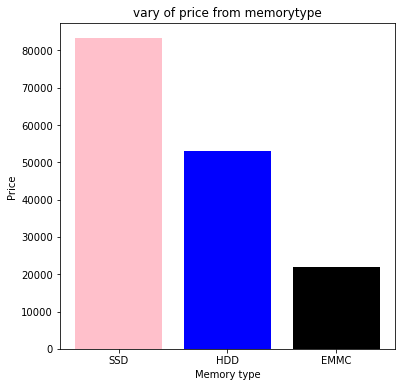

In [100]:
plt.figure(figsize=(6,6))
plt.bar(['SSD','HDD','EMMC'],[ssd,hdd,emmc],color=['pink','blue', 'k'])
plt.xlabel('Memory type')
plt.title('vary of price from memorytype')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Price')

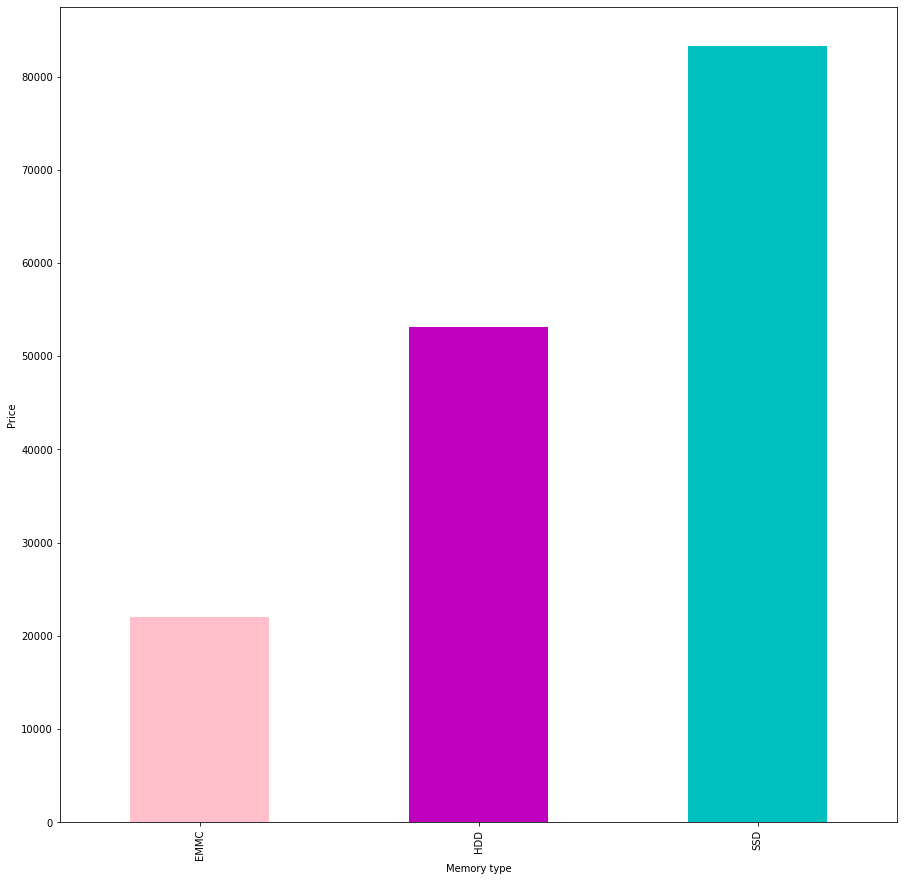

In [101]:
y=lapdata.groupby(['Memory_Type'])['Price-₹']
plt.figure(figsize=(15,15))
y.mean().plot(kind='bar',color=['pink','m', 'c'])
plt.xlabel('Memory type')
plt.ylabel('Price')

 # Price vs ratings

In [103]:
lapdata['Ratings'].unique()

array([4.5, 4.3, 4.2, 4.8, 4.4, 4.6, 4.1])

In [104]:
r1=lapdata[lapdata['Ratings']==4.5]['Price-₹'].values.mean()
r2=lapdata[lapdata['Ratings']==4.3]['Price-₹'].values.mean()
r3=lapdata[lapdata['Ratings']==4.2]['Price-₹'].values.mean()
r4=lapdata[lapdata['Ratings']==4.8]['Price-₹'].values.mean()
r5=lapdata[lapdata['Ratings']==4.4]['Price-₹'].values.mean()
r6=lapdata[lapdata['Ratings']==4.6]['Price-₹'].values.mean()
r7=lapdata[lapdata['Ratings']==4.1]['Price-₹'].values.mean()

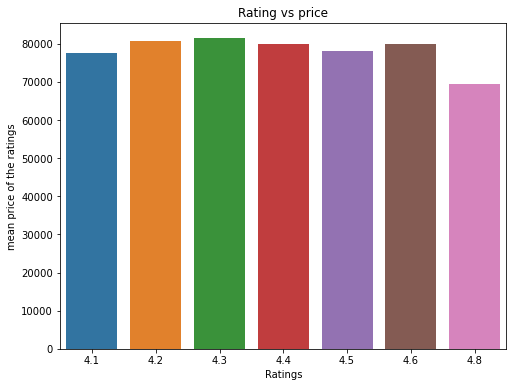

In [105]:
plt.figure(figsize=(8,6))
sns.barplot([4.5, 4.3, 4.2, 4.8, 4.4, 4.6, 4.1],[r1,r2,r3,r4,r5,r6,r7])
plt.title('Rating vs price')
plt.xlabel('Ratings')
plt.ylabel('mean price of the ratings')
plt.show()

Text(0, 0.5, 'mean price of the ratings')

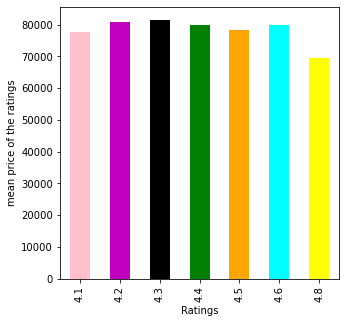

In [106]:
y=lapdata.groupby(['Ratings'])['Price-₹']
plt.figure(figsize=(5,5))
y.mean().plot(kind='bar',color=['pink', 'm', 'black', 'g', 'orange','cyan','yellow' ])
plt.xlabel('Ratings')
plt.ylabel('mean price of the ratings')

<AxesSubplot:xlabel='Brands', ylabel='Price-₹'>

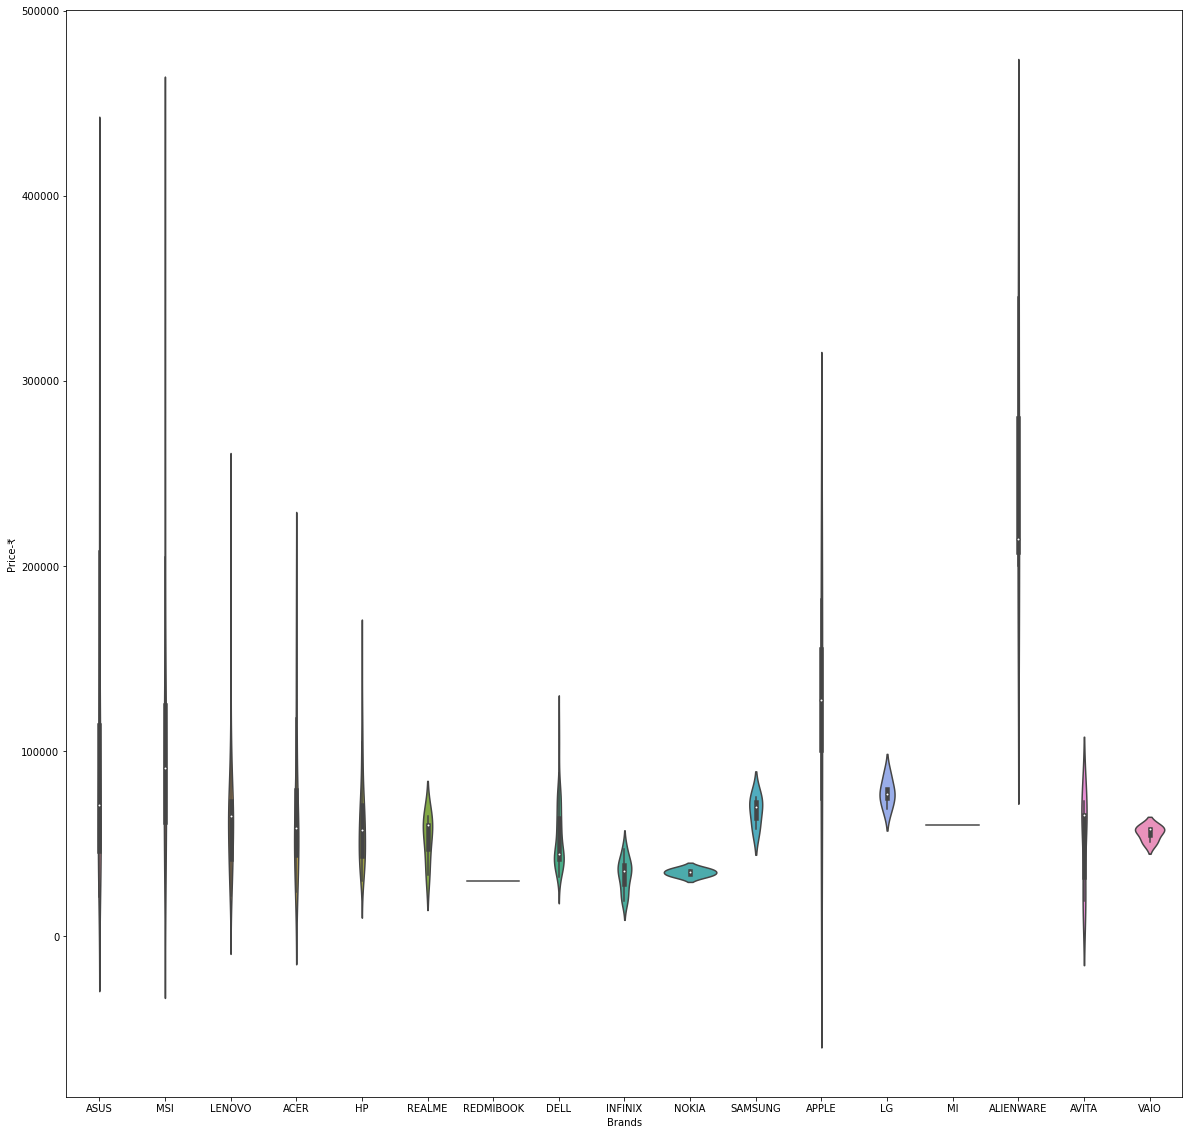

In [107]:
plt.figure(figsize=(20,20))
sns.violinplot(data=lapdata,y='Price-₹',x='Brands')

# Pair plot

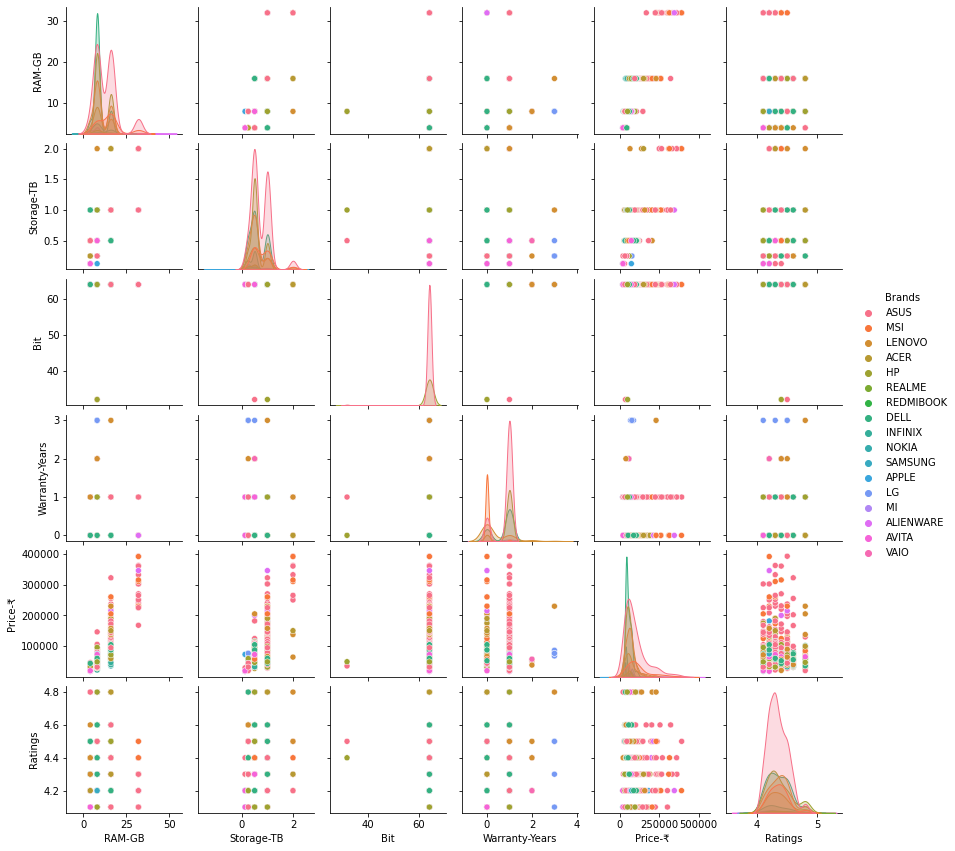

In [109]:
sns.pairplot(lapdata,hue='Brands',size=2)

In [110]:
# Relation plot

# Correlation

In [ ]:
lapdata[['RAM-GB','Price-₹']].corr()

# Covariance   

In [119]:
lapdata[['RAM-GB','Price-₹']].cov()

,RAM-GB,Price-₹
RAM-GB,32.555354,2.739498e+05
Price-₹,273949.823727,3.504394e+09


<AxesSubplot:>

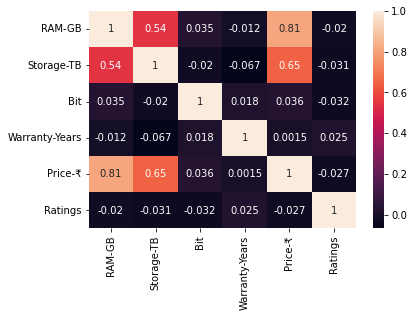

In [120]:
sns.heatmap(lapdata.corr(),annot = True)

# from the we can tell that price-ram and price -storage are sorngely positively corelated  @ 80% and 65%

In [121]:
lapdata

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
0,ASUS,Windows 11,16,0.50,Ryzen 7,64,3700U,1,46990,4.5,SSD
1,ASUS,Windows 11,8,1.00,Ryzen 5,64,5500U,1,63990,4.3,HDD
2,ASUS,Windows 11,8,0.25,Core i3,64,10th Gen,1,27990,4.2,SSD
3,MSI,Windows 11,8,0.50,Ryzen 5,64,5500U,0,39990,4.2,SSD
4,ASUS,Windows 11,8,0.50,Ryzen 5,32,3500U,1,35990,4.5,SSD
...,...,...,...,...,...,...,...,...,...,...,...
574,ASUS,Windows 11,8,0.25,Ryzen 3,64,3250U,1,32490,4.1,SSD
575,ASUS,Windows 11,16,1.00,Ryzen 7,64,5800H,1,94990,4.4,SSD
576,AVITA,Windows 10,8,0.50,Core i5,64,8th Gen,1,73063,4.3,SSD
577,DELL,Windows 10,8,1.00,Core i7,64,7th Gen,1,60758,4.3,HDD


In [15]:
for i in lapdata.columns:
    print(lapdata[i].value_counts(ascending=True).sort_index())
    print("-"*75)

ACER          40
ALIENWARE      3
APPLE          2
ASUS         202
AVITA          6
DELL          88
HP            82
INFINIX       16
LENOVO        72
LG             4
MI             1
MSI           49
NOKIA          2
REALME         5
REDMIBOOK      1
SAMSUNG        3
VAIO           3
Name: Brands, dtype: int64
---------------------------------------------------------------------------
DOS             1
Mac OS          2
Windows 10    205
Windows 11    371
Name: Operating_System, dtype: int64
---------------------------------------------------------------------------
4      36
8     324
16    198
32     21
Name: RAM-GB, dtype: int64
---------------------------------------------------------------------------
0.125      7
0.250     84
0.500    308
1.000    167
2.000     13
Name: Storage-TB, dtype: int64
---------------------------------------------------------------------------
Core i3    135
Core i5    188
Core i7     72
Core i9     17
Ryzen 3     31
Ryzen 5     56
Ryzen 7     56
Ryz

In [122]:
# Modeling

In [124]:
lapdata.head()

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
0,ASUS,Windows 11,16,0.50,Ryzen 7,64,3700U,1,46990,4.5,SSD
1,ASUS,Windows 11,8,1.00,Ryzen 5,64,5500U,1,63990,4.3,HDD
2,ASUS,Windows 11,8,0.25,Core i3,64,10th Gen,1,27990,4.2,SSD
3,MSI,Windows 11,8,0.50,Ryzen 5,64,5500U,0,39990,4.2,SSD
4,ASUS,Windows 11,8,0.50,Ryzen 5,32,3500U,1,35990,4.5,SSD


In [128]:
lapdata['Price-₹'].value_counts()

57990    10
46990     9
64990     9
59990     9
94990     8
         ..
41490     1
94460     1
21513     1
64999     1
49290     1
Name: Price-₹, Length: 302, dtype: int64

In [129]:
lapdata.columns

Index(['Brands', 'Operating_System', 'RAM-GB', 'Storage-TB', 'Processor',
       'Bit', 'Generation', 'Warranty-Years', 'Price-₹', 'Ratings',
       'Memory_Type'],
      dtype='object')

In [154]:
lapdata[lapdata.Brands=='MI']

,Brands,Operating_System,RAM-GB,Storage-TB,Processor,Bit,Generation,Warranty-Years,Price-₹,Ratings,Memory_Type
321,MI,Windows 10,8,0.5,Core i7,64,10th Gen,1,59990,4.1,SSD


In [130]:
x=lapdata[['Brands', 'Operating_System', 'RAM-GB', 'Storage-TB', 'Processor',
       'Bit', 'Generation', 'Warranty-Years',  'Ratings',
       'Memory_Type']]

In [131]:
y=lapdata['Price-₹']

In [132]:
# split into train and test

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=100)

In [134]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,Brands,Operating_System,Processor,Generation,Memory_Type
427,DELL,Windows 11,Core i5,11th Gen,SSD
574,ASUS,Windows 11,Ryzen 3,3250U,SSD
90,MSI,Windows 10,Ryzen 5,4500U,SSD
443,ASUS,Windows 11,Ryzen 9,5900H,SSD
462,HP,Windows 10,Ryzen 7,4700U,SSD


In [135]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])

X_train_num.head()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Ratings
427,16,0.50,64,1,4.2
574,8,0.25,64,1,4.1
90,8,0.50,64,0,4.4
443,16,1.00,64,1,4.2
462,16,1.00,64,1,4.5


In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Ratings
427,0.848345,-0.425813,0.068041,0.613255,-0.875881
574,-0.615598,-1.199047,0.068041,0.613255,-1.450968
90,-0.615598,-0.425813,0.068041,-1.261060,0.274293
443,0.848345,1.120655,0.068041,0.613255,-0.875881
462,0.848345,1.120655,0.068041,0.613255,0.849379


# Applying One hot encoding(categorical to numerical)

In [166]:
from sklearn.preprocessing import OneHotEncoder

encoder_= OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore')


X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,Brands_ALIENWARE,Brands_APPLE,Brands_ASUS,Brands_AVITA,Brands_DELL,Brands_HP,Brands_INFINIX,Brands_LENOVO,Brands_LG,Brands_MSI,...,Generation_5th Gen,Generation_6600H,Generation_6600U,Generation_6800H,Generation_6900H,Generation_7th Gen,Generation_8th Gen,Generation_9th Gen,Memory_Type_HDD,Memory_Type_SSD
427,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
574,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
462,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [159]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Ratings,Brands_ALIENWARE,Brands_APPLE,Brands_ASUS,Brands_AVITA,Brands_DELL,...,Generation_5th Gen,Generation_6600H,Generation_6600U,Generation_6800H,Generation_6900H,Generation_7th Gen,Generation_8th Gen,Generation_9th Gen,Memory_Type_HDD,Memory_Type_SSD
427,0.848345,-0.425813,0.068041,0.613255,-0.875881,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
574,-0.615598,-1.199047,0.068041,0.613255,-1.450968,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90,-0.615598,-0.425813,0.068041,-1.261060,0.274293,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
443,0.848345,1.120655,0.068041,0.613255,-0.875881,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
462,0.848345,1.120655,0.068041,0.613255,0.849379,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# TEST- data pre-processing

In [160]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,Brands,Operating_System,Processor,Generation,Memory_Type
546,LENOVO,Windows 10,Core i3,10th Gen,SSD
514,AVITA,Windows 10,Core i5,7th Gen,SSD
503,LENOVO,Windows 10,Core i5,11th Gen,SSD
114,HP,Windows 11,Core i5,12th Gen,SSD
420,LENOVO,Windows 11,Core i5,11th Gen,SSD


In [161]:
X_test_num = X_test.select_dtypes(include=['float64','int64'])

X_test_num.head()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Ratings
546,8,0.25,64,2,4.5
514,8,0.50,64,1,4.8
503,16,0.50,64,0,4.6
114,16,0.50,64,1,4.2
420,8,0.25,64,1,4.1


# Rescaling the numerical columns

In [162]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Ratings
546,-0.615598,-1.199047,0.068041,2.487570,0.849379
514,-0.615598,-0.425813,0.068041,0.613255,2.574639
503,0.848345,-0.425813,0.068041,-1.261060,1.424466
114,0.848345,-0.425813,0.068041,0.613255,-0.875881
420,-0.615598,-1.199047,0.068041,0.613255,-1.450968


# one hot encoding

In [164]:
X_train_cat.Brands.value_counts()

ASUS         157
DELL          63
HP            62
LENOVO        52
MSI           37
ACER          27
INFINIX       15
REALME         5
AVITA          4
VAIO           3
ALIENWARE      3
LG             2
SAMSUNG        2
APPLE          1
REDMIBOOK      1
Name: Brands, dtype: int64

In [167]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,Brands_ALIENWARE,Brands_APPLE,Brands_ASUS,Brands_AVITA,Brands_DELL,Brands_HP,Brands_INFINIX,Brands_LENOVO,Brands_LG,Brands_MSI,...,Generation_5th Gen,Generation_6600H,Generation_6600U,Generation_6800H,Generation_6900H,Generation_7th Gen,Generation_8th Gen,Generation_9th Gen,Memory_Type_HDD,Memory_Type_SSD
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
114,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,RAM-GB,Storage-TB,Bit,Warranty-Years,Ratings,Brands_ALIENWARE,Brands_APPLE,Brands_ASUS,Brands_AVITA,Brands_DELL,...,Generation_5th Gen,Generation_6600H,Generation_6600U,Generation_6800H,Generation_6900H,Generation_7th Gen,Generation_8th Gen,Generation_9th Gen,Memory_Type_HDD,Memory_Type_SSD
546,-0.615598,-1.199047,0.068041,2.487570,0.849379,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
514,-0.615598,-0.425813,0.068041,0.613255,2.574639,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
503,0.848345,-0.425813,0.068041,-1.261060,1.424466,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
114,0.848345,-0.425813,0.068041,0.613255,-0.875881,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
420,-0.615598,-1.199047,0.068041,0.613255,-1.450968,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [181]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()

In [182]:
model=reg.fit(X_train_transformed,y_train)

In [183]:
predicted=model.predict(X_test_transformed)

In [184]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [185]:
mean_squared_error(y_test,predicted)

3.226349456938575e+32

In [186]:
r2_score(y_test,predicted)

-7.35995452002776e+22

In [187]:
# data modeling 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import numpy as np

In [188]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    
}

In [192]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')  
    print(f'Training Accuracy: {model.score(X_train_transformed, y_train)}')
    print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')
    print('-'*30)

Using model: LR
MSE Score: 1.796204180191822e+16
Training Accuracy: 0.8872111154657638
Testing Accuracy: -7.35995452002776e+22
------------------------------
Using model: KNNR
MSE Score: 21481.76243445781
Training Accuracy: 0.8690015359195269
Testing Accuracy: 0.8947302615193302
------------------------------
Using model: SVR
MSE Score: 69442.88212974163
Training Accuracy: -0.09579506395672288
Testing Accuracy: -0.10006715951431344
------------------------------
Using model: DT
MSE Score: 21901.07127162568
Training Accuracy: 0.9866139360689921
Testing Accuracy: 0.8905805714950609
------------------------------
Using model: RF
MSE Score: 21194.971665494035
Training Accuracy: 0.9651770658446013
Testing Accuracy: 0.8975222914561196
------------------------------


# The problem statement of this data set is the predict the Price of a laptops
# our target variable is price it is a regression type of problem
# for that so i used different types of algorithms here
# they are LR,KNNR,SVR,DT and random forest Regressor
#  out of all the Models Decessiontree model is performing pretty well with accuracy score of 89%
